# Data Storytelling


In this Notebook, I want to explore a few interesting questions about our dataset.

While the ultimate goal of the project is to predict the `fare amount` of a given taxi ride, why not explore additional facets of our data?

In addition to satifying some curious minds, the upcoming insights will mainly benefit two types of people:

### 1. Regular Cab Riders
We've all taken a cab at least once in our lives. But if you're a regular rider, you might have wondered: 
1. At what time should you leave to pay the lowest fare?
2. When should you leave to minimize trip duration?

Now you might already have some guesses, but we'll analyze the data, and see if anything cool comes up.

### 2. NYC Taxi Drivers
If you're a taxi driver, you probably care about being as efficient as possible and about maximizing your profits. Thus, we'll tackle questions like:
1. When and where do you get paid the most for your time?
2. When and where is there the highest demand?

Let's start with a few 'administartive' tasks and then we'll hop right in.

In [1]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read 2017 Trip Data - Cleaned
data = pd.read_csv('data/tripdata_2017_clean.csv')

# Categorizing some data for quicker operations
data['PULocationID'] = data.PULocationID.astype('category')
data['DOLocationID'] = data.DOLocationID.astype('category')
data['day_of_week'] = data.day_of_week.astype('category')
data['hour_of_day'] = data.hour_of_day.astype('category')
data['passenger_count'] = data.passenger_count.astype('category')

Let's define a helper fucntion which we'll use later on for a few of our plots.

Don't worry if it looks confusing for now, just skip right over. We'll see it in action in a bit.

In [21]:
# Helper function to draw two side-by-side plots for a given feature of the 
# dataset and seeing how they change by day of the week and hour of the day.
def plot_graphs(col, agg_func, x_label, y_label, y_upper_lim, plt1_tit, plt2_tit) :
    # Create subplots to display figures side by side.
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))

    # Plot y_label by day and hour of day.
    data.groupby(['day_of_week', 'hour_of_day'])[col].agg(agg_func).unstack(0).plot(ax=axes[0])
    # Plot y_label by hour of day.
    data.groupby('hour_of_day')[col].agg(agg_func).plot(ax=axes[1])

    #Set titles and labels for axes.
    for i in range(0, 2): 
        axes[i].set_xlabel(x_label)
        axes[i].set_xticks(np.arange(0, 24))
        axes[i].set_ylabel(y_label)
        axes[i].set_ylim([0, y_upper_lim])
    axes[0].set_title(plt1_tit)
    axes[1].set_title(plt2_tit)

    # Clean and display
    plt.tight_layout()
    plt.show()

Let's also define two new columns which we'll use later on:
1. `price_per_mile`: denotes the avg price per mile for a given journey (excluding the starting price of `$2.50`)
2. `fare_per_hour`: average price paid per unit of time (an hour in this case) for a given journey.

In [22]:
# Compute price per mile (excluding starting fare) and save in a new column
data['price_per_mile'] = round((data.fare_amount - 2.5) / data.trip_distance, 2)

In [23]:
# Compute fare per hour driven and save in a new column
data['fare_per_hour'] = round((data.fare_amount * 3600) / data.trip_duration, 2)

Cool, now that we're set up, we're ready to answer the first question:

### At What Time Should You Leave to Pay the Lowest Fare?

To answer this question, let's make two plots:
1. Average `price per mile`, grouped by `Weekday` and `Hour of Day`.
2. Average `price per mile`, grouped by `Hour of Day`.

That sounds like a mouthful, so let's take a look at the plots below.

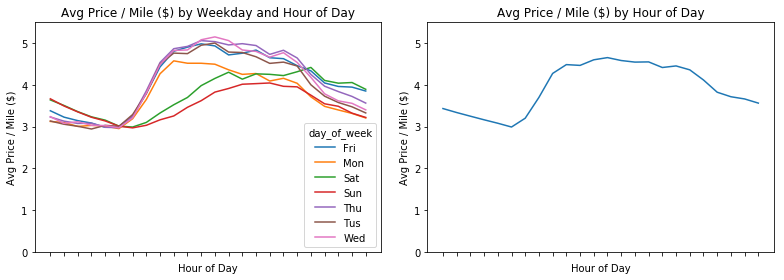

In [24]:
# Plot 1) Avg price/mile by day and hour of day 2) Avg price/mile by hour of day
plot_graphs('price_per_mile', 'mean', 'Hour of Day', 'Avg Price / Mile ($)', 5.5, 
            'Avg Price / Mile ($) by Weekday and Hour of Day',
            'Avg Price / Mile ($) by Hour of Day')

Ok, let's decipher the plots above by noting a few insights:
1. The best time to leave is around `5-6 am` (for all days) where you can expect to pay around `$3.00` per mile (plus the starting price of course). It quickly increases after that (espcially on weekdays), reaching it's peak at around lunch time. Expect to pay an **additional** `$1.50` to `$2.00` per mile at that time.
2. Looking at weekdays, Monday is slightly cheaper than the other days, particularly after `8am`.
3. Travelling on weekends? Don't leave before `5-6 am`; it's more expensive if you leave before then. Obviously, if it's a Satuday night (or Friday), it will be ~`$0.30` more exepnsive per mile on average. 

Before we draw any conclusions, let's address another quick question...
### When Should You Leave to Minimize Trip Duration?

Again, another two plots have been drawn:
1. `Avg Trip Speed (mph)` by `Weekday` and `Hour of Day`
2. `Avg Trip Speed (mph)` by `Hour of Day`

Let's take a look at them below:

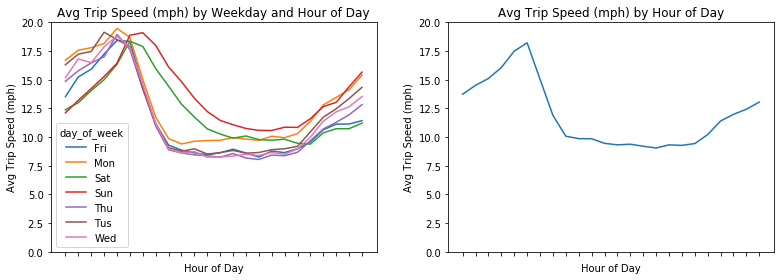

In [25]:
# 1) Plot Avg price/mile by day and hour of day 2) Avg price/mile by hour of day
plot_graphs('avg_speed', 'mean', 'Hour of Day', 'Avg Trip Speed (mph)', 20, 
            'Avg Trip Speed (mph) by Weekday and Hour of Day',
            'Avg Trip Speed (mph) by Hour of Day')

So what can we see this time?
1. `Avg trip speed` is inversely proportional to `avg price / mile` (shown previously above). More clearly stated, faster rides correlate very well with a lower `price / mile` for the rider.
2. A time between `5 and 6 am` yeilds the fastest journey overall `~19mph`. Waiting as little as 3 hours will almost double your journey time, and this gradually gets worse until around `6pm`, until it sharply improves again.
3. As with before, Monday rides seem to be quicker among other weekdays, with weekend rides being even faster up until the `6pm` mark.

### Conclusions:

1. `5 - 6 am` is the best time to leave by far. That is, early birders get rewarded with noiticeably lower fares and shorter trip durations. It gets sharply worse until around `8 am`, so make sure you wake up as soon as you can.
2. If you're leaving anytime from `8am to 6pm`, it won't make that much of a difference, though again, there is a slight advantage in earlier times.
3. Leaving after `6pm`? Just be aware that trip speed and fare amounts improve noticeably from `6pm` onwards.

So we've drawn a few insights from the rider's perspective. Let's now analyze the data from the driver's perspective.

This seems like an interesting question:
### When Do Drivers Get Paid the Most for Their Time?

To answer this question, let's plot two figures similar to the ones we've seen before:
1. Average Fare (`$`) / Hour Driven, grouped by Weekday and Hour of Day.
2. Average Fare (`$`) / Hour Driven, grouped by Hour of Day.

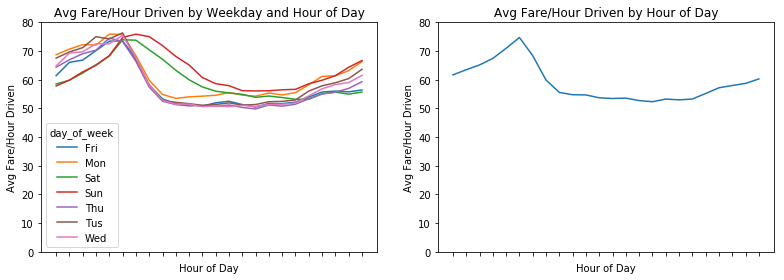

In [26]:
# 1) Plot Avg price/mile by day and hour of day 2) Avg price/mile by hour of day
plot_graphs('fare_per_hour', 'mean', 'Hour of Day', 'Avg Fare/Hour Driven', 80, 
            'Avg Fare/Hour Driven by Weekday and Hour of Day',
            'Avg Fare/Hour Driven by Hour of Day')

You've probably noticed that the following plots look very similar to the preceding plots above. That is, when you are travelling fastest (around `5 - 6 am`), you are also likely to make more money per time spent driving. That makes sense, because you make money based on distance travelled time spent travelling.

So if you are interested in making as much money as possible, make sure you're driving early mornings as well as night times past `6pm` (the later the better). You can expect to make as much as `50%` more at those times than if you drive during business hours (especially on weekdays).

If you prefer driving during daytime hours, then weekends are the best days of the week, followed by Monday.

So now we know when we should drive to make the most money. But does rider demand match the plots above. Let's answer the following question:

### When is There the Most Rider Demand?

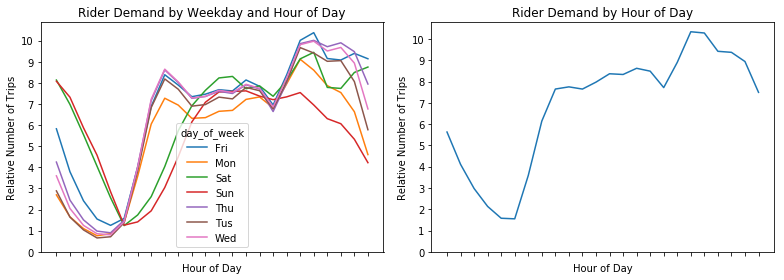

In [27]:
# The following plots display # of trips by weekday and hour. The figures
# have been scaled down to a relative scale of 10 rides per given hour of
# the day.

# Create subplots to display two figures side by side.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))

# Plot # of trips (relative) by day and hour of day.
data.groupby(['day_of_week', 'hour_of_day']).size().unstack(0).plot(ax=axes[0])
# Plot # of trips (relative) by hour of day.
data.groupby('hour_of_day').size().plot(ax=axes[1])

# Set labels for axes.
for i in range(0, 2): 
    axes[i].set_xlabel('Hour of Day')
    axes[i].set_ylabel('Relative Number of Trips')
    axes[i].set_xticks(np.arange(0, 24))

# Set ticks and scale down relatively. 
axes[0].yaxis.set_ticks(np.arange(0, 2700, 250))
axes[0].yaxis.set_ticklabels(np.arange(0, 11, 1))
axes[1].yaxis.set_ticks(np.arange(0, 17000, 1575))
axes[1].yaxis.set_ticklabels(np.arange(0, 11, 1))

# Set titles for both graphs
axes[0].set_title('Rider Demand by Weekday and Hour of Day')
axes[1].set_title('Rider Demand by Hour of Day')

# Clean and display
plt.tight_layout()
plt.show()

Ok, so these graphs looks a bit new to us. Let's see what insights we can extract:
1. While `5-6 am` is the best time of day to leave (for both riders and drivers), it is actually the worst overall in terms of rider demand. So if you want to catch those riders, wake up early and be ready.
2. There is a high demand for rides after `8am`, particularly when people arrive and leave from work. The demand is about 4 to 5 times that in the morning. This could mean you have more availability in your local area, so you can save up on gasoline. The demand is pretty stable across that entire timeframe, so you can also pick and choose the hours you like or that make you the most money.

Next, let's put the following insights into perspective by looking at rider demand by location (on a relative scale). But before we do that, let's map each of the pickup location IDs to one on NYC's boroughs `{Bronx, Brooklyn, Manhattan, Queens, Staten Island}`.

In [10]:
# Maps PULocationID to one of NYC' boroughs.
taxi_zone_dict = {}

# Enumerating IDs for NYC's five boroughs.
bronx_ids = [3, 18, 20, 31, 32, 46, 47, 51, 58, 59, 60, 69, 78, 81, 94, 119, 126, 136, 147, 159, 167, 168, 169,
             174, 182, 183, 184, 185, 199, 200, 208, 212, 213, 220, 235, 240, 241, 242, 247, 248, 250, 254, 259]
brooklyn_ids = [11, 14, 17, 21, 22, 25, 26, 29, 33, 34, 35, 36, 37, 39, 40, 49, 52, 54, 55, 61, 62, 63, 65, 66,
                67, 71, 72, 76, 77, 80, 85, 89, 91, 97, 106, 108, 111, 112, 123, 133, 149, 150, 154, 155, 165,
                177, 178, 181, 188, 189, 190, 195, 210, 217, 222, 225, 227, 228, 255, 256, 257]
manhattan_ids = [4, 12, 13, 24, 41, 42, 43, 45, 48, 50, 68, 74, 75, 79, 87, 88, 90, 100, 103, 104, 105, 107, 113,
                 114, 116, 120, 125, 127, 128, 137, 140, 141, 142, 143, 144, 148, 151, 152, 153, 158, 161, 162,
                 163, 164, 166, 170, 186, 194, 202, 209, 211, 224, 229, 230, 231, 232, 233, 234, 236, 237, 238,
                 239, 243, 244, 246, 249, 261, 262, 263]
queens_ids = [2, 7, 8, 9, 10, 15, 16, 19, 27, 28, 30, 38, 53, 56, 57, 64, 70, 73, 82, 83, 86, 92, 93, 95, 96, 98,
              101, 102, 117, 121, 122, 124, 129, 130, 131, 132, 134, 135, 138, 139, 145, 146, 157, 160, 171, 173,
              175, 179, 180, 191, 192, 193, 196, 197, 198, 201, 203, 205, 207, 215, 216, 218, 219, 223, 226, 252,
              253, 258, 260]
staten_island_ids = [5, 6, 23, 44, 84, 99, 109, 110, 115, 118, 156, 172, 176, 187, 204, 206, 214, 221, 245, 251]

# Mapping each ID to it's respective borough
for i in bronx_ids:
    taxi_zone_dict[i] = 'Bronx'
for i in brooklyn_ids:
    taxi_zone_dict[i] = 'Brooklyn'
for i in manhattan_ids:
    taxi_zone_dict[i] = 'Manhattan'
for i in queens_ids:
    taxi_zone_dict[i] = 'Queens'
for i in staten_island_ids:
    taxi_zone_dict[i] = 'Staten Island'

# Adding a new column 'borough' to our dataframe and casting as type 'category'.
data['borough'] = data.PULocationID.map(taxi_zone_dict).astype('category')

### Where is There the Highest Demand?
Now that we've mapped all the pickup IDs to their respective boroughs, let's look at the distribution of rides by location.

Note two things about the plot below:
1. Since there is a big variation in values, we'll use a logarithmic scale on the vertical axis.
2. The y-scale is showing relative trip frequencies as we have chosen a representative sample.

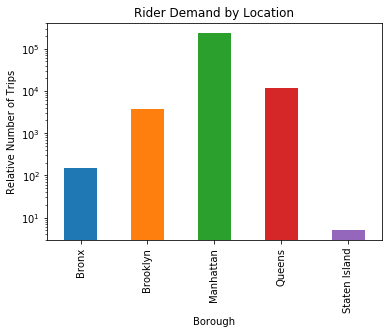

In [11]:
# Plot relative # of trip durations by location
data.groupby('borough').size().plot(kind='bar')

# 'Prettifying' the graph and adding some details.
plt.yscale('log')
plt.title('Rider Demand by Location')
plt.xlabel('Borough')
plt.ylabel('Relative Number of Trips')
plt.show()

This chart gives us some really cool insights:
1. Trips starting from `Bronx` and `Staten Island` represent `~0.06%` of all rides. If you're waiting for riders there, you're probably spending a higher proportion of your time waiting for riders, than actually driving.
2. Though better, trips starting from `Brooklyn` and `Queens` also represent a small percentage of trips: `1.4%` and `4.6%` respectively. These locations may be viable during peak hours where there is high rider demand, especially if they are in your local area.
3. `~94%` of all trips start from `Manhattan`. That is a staggering difference, which can help you cut on waiting time and increase you travelling time. If you want to catch those `5-6 am` riders (where there is less demand, and higher reward), then `Manhattan` seems like a promising spot to get your share of the pie.

Knowing these figures, we can guess that the rider demand by hour (shown previously above) is highly indicative of the `Manhattan` area. By plotting rider demand by `hour` and `location`, we can see a more accurate though similar distribution:

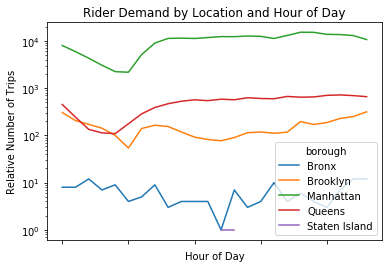

In [12]:
# Plotting relative number of trips by pickup location and hour of day.
data.groupby(['borough', 'hour_of_day']).size().unstack(0).plot()

# 'Prettifying' the graph and adding some details.
plt.yscale('log')
plt.title('Rider Demand by Location and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Relative Number of Trips')
plt.show()

Finally, before we draw any final conclusions, let's see if the average money you make per hour driven changes based on location.
### Where Do You Get Paid the Most for Your Time?
We can see there are some mild differences, with `Manhattan` earning you the least amount of money per hour driven overall, but that is probably outweighed with the fact that there is a lot of demand there, and you'll spend more time driving.

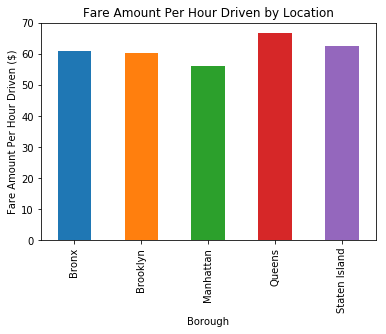

In [13]:
# Plotting avg fare per hour based on location
data.groupby('borough')['fare_per_hour'].mean().plot(kind='bar')

# 'Prettifying' the graph and adding some details.
plt.title('Fare Amount Per Hour Driven by Location')
plt.xlabel('Borough')
plt.ylabel('Fare Amount Per Hour Driven ($)')
plt.show()

### Conclusions:

1. Just like `5-6 am` is the best time for riders, it is also the best time for drivers to make the most money. On weekdays, a 3 hour delay from this time will yield in a ~33% drop in expected money earned. So yes, make sure you register those early hours.
2. Unsurprisingly, `5-6 am` rides have the lowest demand compared to other times of the day... another reason to wake up early and earn your piece of the pie. The demand quadruples by `8am`, remaining quite steady till the end of the day.
3. `94%` of all rides start in `Mahattan`, so it's a good idea to start and return there after each of your rides. It's particularly important in the golden hours of `5-6 am` when the demand is particularly low. During busier times, it's good to experiment with different pickup zones in `Manhattan` itself, or if you're close to `Queens` or `Brooklyn`, you can give those a shot. Otherwise, it's better to return to `Manhattan`. `Staten Island` and `Bronx` pickup zones are rarely used by riders, so it's a good idea to avoid them altogether.
